In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import scipy
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import (accuracy_score, f1_score, roc_curve, auc, precision_recall_curve, 
                             classification_report, confusion_matrix, roc_auc_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier, early_stopping

%matplotlib inline

In [5]:
df = pd.read_csv("Capstone Project/income_evaluation.csv")

In [7]:
print("DATA PREPARATION")

DATA PREPARATION


In [9]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
# data tidak ada yang kosong
print(df.isnull().sum())
print("=====================")
print(df.isna().sum())

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64
age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64


In [11]:
# merhilangkan isi tabel yang berisikan '?' dan NaN
shape0 = df.shape[0]
for column in df.columns:
    df[column].replace(' ?', np.NaN, inplace=True)
df = df.dropna().reset_index().drop(columns=['index'])
shape1 = df.shape[0]
print(str(shape0 - shape1) + ' rows have been removed.')

2399 rows have been removed.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30162 non-null  int64 
 1    workclass       30162 non-null  object
 2    fnlwgt          30162 non-null  int64 
 3    education       30162 non-null  object
 4    education-num   30162 non-null  int64 
 5    marital-status  30162 non-null  object
 6    occupation      30162 non-null  object
 7    relationship    30162 non-null  object
 8    race            30162 non-null  object
 9    sex             30162 non-null  object
 10   capital-gain    30162 non-null  int64 
 11   capital-loss    30162 non-null  int64 
 12   hours-per-week  30162 non-null  int64 
 13   native-country  30162 non-null  object
 14   income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


In [18]:
# item dari setiap kolom
categorical_var = list(df.select_dtypes(include=object).columns)
for item in categorical_var:
    print(item + ":")
    print(df[item].unique())

 workclass:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
 education:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
 marital-status:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 occupation:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
 relationship:
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
 race:
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
 sex:
[' Male' ' Female']
 native-country:
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' '

In [14]:
# menampilkan umur terbanyak pada dataset
age = df['age'].value_counts()

age_top = age.sort_values(ascending = False)
print(age_top.head(3))
print("=====================")

36    852
31    851
33    837
Name: age, dtype: int64


In [15]:
education = df[' education'].value_counts()
education.head(5)

 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
Name:  education, dtype: int64

In [16]:
education = df[' education'].value_counts()
marital_status = df[' marital-status'].value_counts()
occupation = df[' occupation'].value_counts()
race = df[' race'].value_counts()
sex = df[' sex'].value_counts()
hours_per_week = df[' hours-per-week'].value_counts()

education_top = education.sort_values(ascending = False)
print("Education")
print(education_top.head(3))
print("=====================")
marital_status_top = marital_status.sort_values(ascending = False)
print("Marital Status")
print(marital_status_top.head(3))
print("=====================")
occupation_top = occupation.sort_values(ascending = False)
print("Occupation")
print(occupation_top.head(3))
print("=====================")
race_top = race.sort_values(ascending = False)
print("Race")
print(race_top.head(3))
print("=====================")
sex_top = sex.sort_values(ascending = False)
print("Sex")
print(sex_top)
print("=====================")
hours_per_week_top = hours_per_week.sort_values(ascending = False)
print("Hours Per Week")
print(hours_per_week_top.head(3))

# error

Education
 HS-grad         9840
 Some-college    6678
 Bachelors       5044
Name:  education, dtype: int64
Marital Status
 Married-civ-spouse    14065
 Never-married          9726
 Divorced               4214
Name:  marital-status, dtype: int64
Occupation
 Prof-specialty     4038
 Craft-repair       4030
 Exec-managerial    3992
Name:  occupation, dtype: int64
Race
 White                 25933
 Black                  2817
 Asian-Pac-Islander      895
Name:  race, dtype: int64
Sex
 Male      20380
 Female     9782
Name:  sex, dtype: int64
Hours Per Week
40    14251
50     2718
45     1753
Name:  hours-per-week, dtype: int64


In [14]:
# df['net_gain'] = df[' capital-gain'] - df[' capital-loss']

array([[<AxesSubplot:title={'center':'net_gain'}>,
        <AxesSubplot:title={'center':' hours-per-week'}>]], dtype=object)

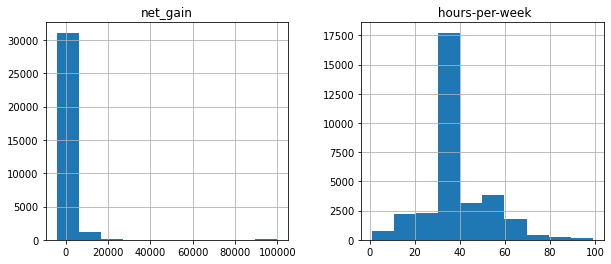

In [15]:
# df.hist(column=['net_gain', ' hours-per-week'], figsize=(10, 4))

In [16]:
# df.value_counts(subset=[' hours-per-week'], sort=False)

 hours-per-week
1                  20
2                  32
3                  39
4                  54
5                  60
                   ..
95                  2
96                  5
97                  2
98                 11
99                 85
Length: 94, dtype: int64

Text(0.5, 1.0, 'Box plot representing age and income \n')

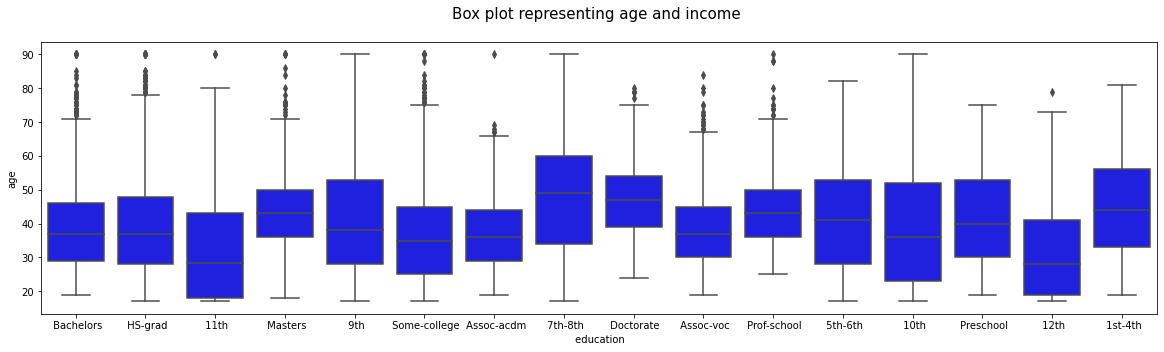

In [25]:
#Variation between education and age
plt.figure(figsize=(20,5))
sns.boxplot(x=df[' education'],y=df['age'],color='b')
plt.title("Box plot representing age and education \n", size = 15)

Text(0.5, 1.0, 'Box plot representing age and income \n')

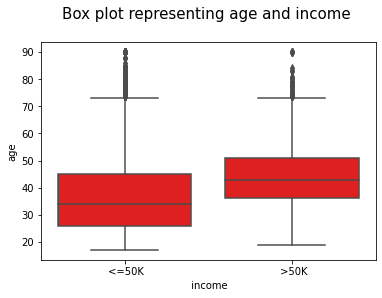

In [29]:
#Variation between age and income level
sns.boxplot(x=df[' income'],y=df['age'],color='r')
plt.title("Box plot representing age and income \n", size = 15)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


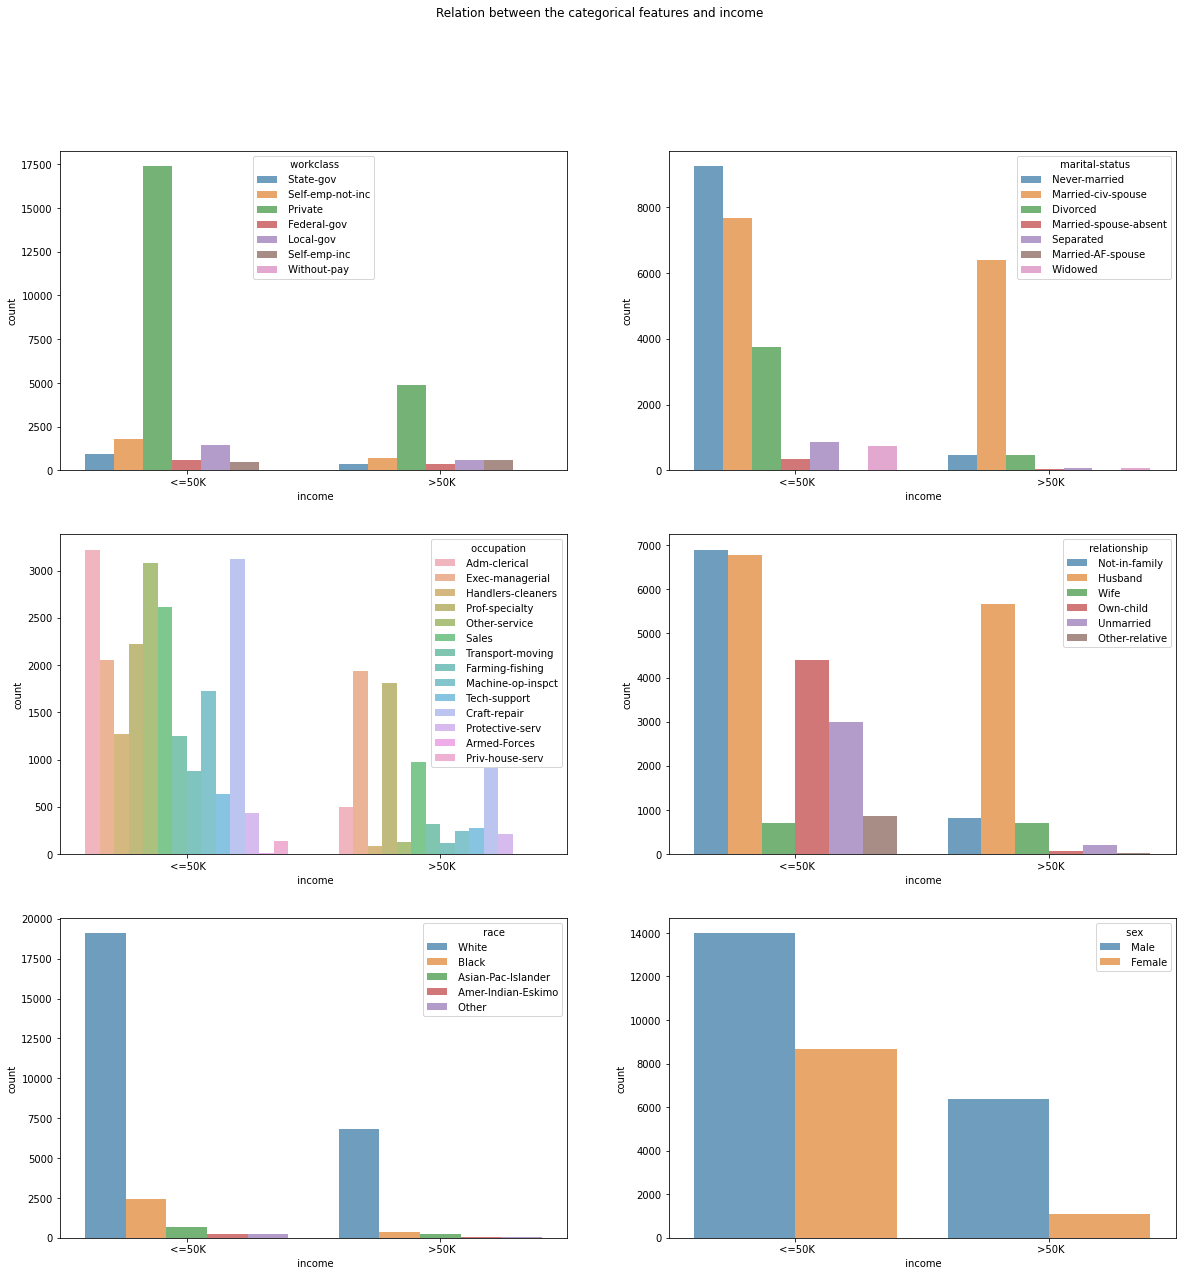

In [30]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
axs = axs.flatten()
fig.suptitle('Relation between the categorical features and income')

categorical2 = [' workclass', ' marital-status',' occupation',' relationship',' race',' sex']
for ax, i in enumerate(categorical2):
    plt.legend( bbox_to_anchor=(1.1, 1.1), loc='upper left')
    sns.countplot(x=' income', alpha=0.7, hue=i, data=df, ax=axs[ax])

In [17]:
X = df.drop([' income'], axis=1)
y = df[['ID', ' income']]

In [18]:
y[' income'].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y[' income'], random_state=10)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train

(24420, 16) (8141, 16) (24420, 2) (8141, 2)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,ID,net_gain
12497,28,Self-emp-not-inc,188278,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,55,United-States,12497,0
5371,25,Private,206343,HS-grad,9,Never-married,Protective-serv,Other-relative,White,Male,0,0,40,United-States,5371,0
20679,37,Private,46385,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,20679,0
8397,34,Private,192002,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,8397,0
23995,55,Self-emp-not-inc,322691,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,3103,0,55,United-States,23995,3103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20932,30,Private,229504,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,20932,0
1624,31,Private,175548,HS-grad,9,Never-married,Other-service,Not-in-family,Other,Female,0,0,35,United-States,1624,0
19584,64,Self-emp-not-inc,192695,5th-6th,3,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,70,Canada,19584,0
13608,27,?,162104,9th,5,Never-married,?,Own-child,White,Female,0,0,40,United-States,13608,0


In [20]:
train_id = y_train['ID']
test_id = y_test['ID']

y_train = y_train[' income']
y_test = y_test[' income']
X_train.drop('ID', axis=1, inplace=True)
X_test.drop('ID', axis=1, inplace=True)

y_test.head()

8208       >50K
9899      <=50K
180        >50K
30060     <=50K
559       <=50K
Name:  income, dtype: object

In [21]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1748, stratify=y_train, random_state=42)

print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

(20151, 15) (4269, 15) (20151,) (4269,)


In [23]:
display(df.groupby(' occupation').agg({'age' : ['mean', 'median']}))
display(df.groupby(' income').agg({'age' : ['mean', 'median']}))

age       
                         mean median
 occupation                         
 ?                  40.882800   35.0
 Adm-clerical       36.964456   35.0
 Armed-Forces       30.222222   29.0
 Craft-repair       39.031471   38.0
 Exec-managerial    42.169208   41.0
 Farming-fishing    41.211268   39.0
 Handlers-cleaners  32.165693   29.0
 Machine-op-inspct  37.715285   36.0
 Other-service      34.949621   32.0
 Priv-house-serv    41.724832   40.0
 Prof-specialty     40.517633   40.0
 Protective-serv    38.953775   36.0
 Sales              37.353973   35.0
 Tech-support       37.022629   36.0
 Transport-moving   40.197871   39.0

age       
              mean median
 income                  
 <=50K   36.783738   34.0
 >50K    44.249841   44.0

In [24]:
# making two lists of columns name
numeric_columns = ['age', ' capital-gain',' capital-loss', ' hours-per-week', ' income-num']
categorical = [' workclass', ' education','age',  ' education-num', ' marital-status',
               ' occupation',' relationship',' race',' sex', ' native-country',' income']

In [25]:
shape0 = df.shape[0]
for column in df.columns:
    df[column].replace(' ?', np.NaN, inplace=True)
df = df.dropna().reset_index().drop(columns=['index'])
shape1 = df.shape[0]
print(str(shape0 - shape1) + ' rows have been removed.')

2399 rows have been removed.


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30162 non-null  int64 
 1    workclass       30162 non-null  object
 2    fnlwgt          30162 non-null  int64 
 3    education       30162 non-null  object
 4    education-num   30162 non-null  int64 
 5    marital-status  30162 non-null  object
 6    occupation      30162 non-null  object
 7    relationship    30162 non-null  object
 8    race            30162 non-null  object
 9    sex             30162 non-null  object
 10   capital-gain    30162 non-null  int64 
 11   capital-loss    30162 non-null  int64 
 12   hours-per-week  30162 non-null  int64 
 13   native-country  30162 non-null  object
 14   income          30162 non-null  object
 15  ID               30162 non-null  int64 
 16  net_gain         30162 non-null  int64 
dtypes: int64(8), object(9)
memory u